In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib

In [51]:
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA


In [6]:
data=pd.read_csv('salesdaily.csv')

In [7]:
data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [9]:
data=data[['datum','N02BE']]

In [10]:
data.head()

,datum,N02BE
0,1/2/2014,32.40
1,1/3/2014,50.60
2,1/4/2014,61.85
3,1/5/2014,41.10
4,1/6/2014,21.70


In [11]:
def dataoverview(df,message):
    print(f'{message}: \n')
    print('\nNumberof rows: ', df.shape[0])
    print('\nFeatures: ',df.shape[1])
    print('\nColumns: \n',df.columns.to_list())
    print('\nColumn Dtypes: \n\n',df.info())
    print('\nStatistical Details: \n', df.describe())
    #print('\nMissing values: \n')
    if df.isnull().sum().sum()>0:
        print('\nMissing values each column: \n',df.isnull().sum())
    else:
        print('\nMissing values: ',df.isnull().sum().sum())
    print('\nNumber of unique values: \n', df.nunique())

In [12]:
dataoverview(data,'Data overview')

Data overview: 


Numberof rows:  2106

Features:  2

Columns: 
 ['datum', 'N02BE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   2106 non-null   object 
 1   N02BE   2106 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.0+ KB

Column Dtypes: 

 None

Statistical Details: 
              N02BE
count  2106.000000
mean     29.917095
std      15.590966
min       0.000000
25%      19.000000
50%      26.900000
75%      38.300000
max     161.000000

Missing values:  0

Number of unique values: 
 datum    2106
N02BE     713
dtype: int64


In [13]:
data['datum']=pd.to_datetime(data['datum'])

C:\Users\iyrip\AppData\Local\Temp\ipykernel_14512\1884351938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datum']=pd.to_datetime(data['datum'])


### Pandas visualisation

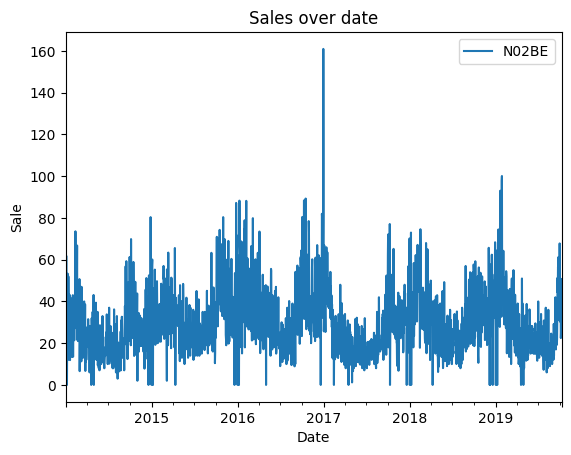

In [16]:
data.plot(x='datum', y='N02BE', kind='line')

plt.xlabel('Date')
plt.ylabel('Sale')
plt.title('Sales over date')

plt.show()

## Visualisation in seaborn 

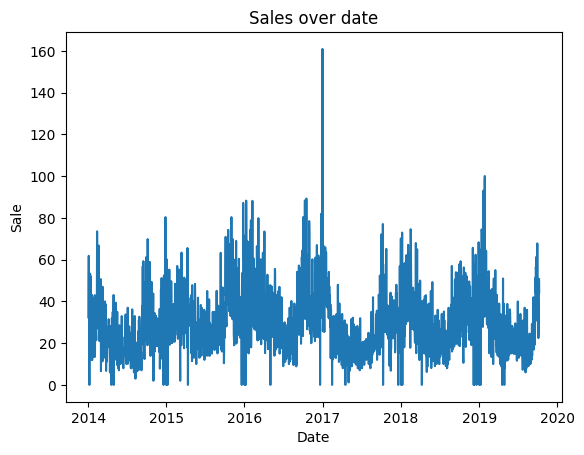

In [17]:
sns.lineplot(x='datum', y='N02BE', data=data)

plt.xlabel('Date')
plt.ylabel('Sale')
plt.title('Sales over date')

plt.show()

## Boxplot to determine is an outlier for our model 

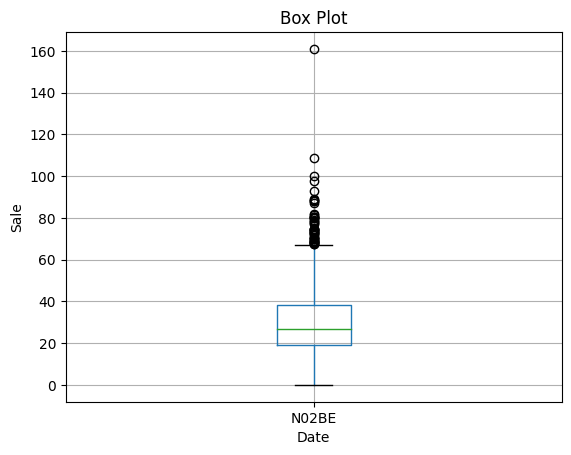

In [19]:
data.boxplot(column='N02BE')

plt.xlabel('Date')
plt.ylabel('Sale')
plt.title('Box Plot')

plt.show()

## Observation

- Based on the line plot and boxplot we found most of the data lies between 0 to 70
- We need to check how many data we have more that 70

In [21]:
data[data['N02BE']>70].count()

datum    37
N02BE    37
dtype: int64

In [22]:
data.shape[0]

2106

## Observation

- We can see that only 37 values are belong to morethan 70 from 2106.
- based on my observation removing outlier data point is not a good idea
- But here as we can see in the box plot and lineplot there is one data point is standing out appart from the data
- there is only one value above the 110 but this point is in 161. we found the value from Datareview
- So we are removing that for our model

In [24]:
outlier=161
data.drop(data[data['N02BE']==outlier].index, inplace=True)

In [26]:
data.shape[0]

2105

## Now we are going to check the distribution of data using Histogram on daily basis data

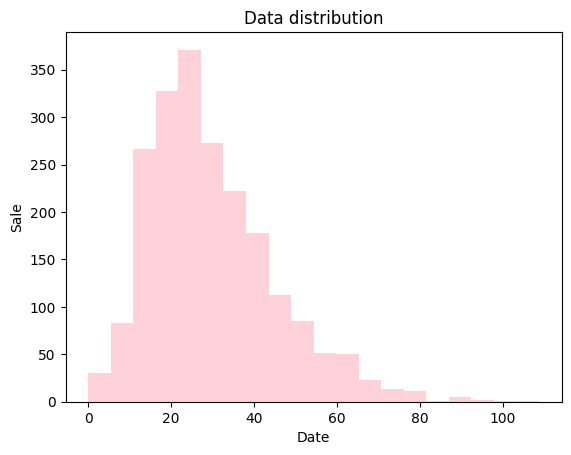

In [28]:
plt.hist(data['N02BE'], bins=20, color='pink', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Sale')
plt.title('Data distribution')

plt.show()

### Calculate skewess and Kurtosis
##### Skewness: 
- Skewness measures the asymmetry of the probability distribution or dataset.
- A skewness value of 0 indicates a perfectly symmetrical distribution where the left and right sides are mirror images of each other.
- A skewness value of 0 indicates a perfectly symmetrical distribution where the left and right sides are mirror images of each other.
- A negative skewness (less than 0) indicates that the tail on the left side of the distribution is longer or fatter than the right side, indicating a
  left-skewed (negatively skewed) distribution. The data is concentrated on the right.

##### Kurtosis:
- 
Kurtosis measures the "tailedness" or peakness of the probability distribution or datase
- .
A kurtosis value of 3 (or 0 excess kurtosis) is typically associated with a normal distribution. This is called mesokurt
- c.
Excess kurtosis greater than 3 indicates a distribution with heavier tails and a sharper peak, known as leptokurtic or positively kur
- ic.
Excess kurtosis less than 3 indicates a distribution with lighter tails and a flatter peak, known as platykurtic or negatively kurtic.

In [30]:
skewness= skew(data['N02BE'])
kurtosis=kurtosis(data['N02BE'])

print('Skewness: ',skewness)
print('\nKurtosis: ',kurtosis)

Skewness:  0.979329768679471

Kurtosis:  1.3321802765278319


- For this case data is is skewed left
- Showing negative kurtosis
- In this case financial data often exhibits left-skewness due to the presence of large negative returns.
- They provide valuable information about the characteristics of your data, and the decision to address them

#### Changing columns for easy remember 

In [33]:
data.columns=['Date','Sales']

#### Setting date column as the data index

In [34]:
data.columns

Index(['Date', 'Sales'], dtype='object')

In [35]:
data.set_index('Date',inplace=True)

#### Grouping the date to months and sum up the sale quantities

In [36]:
monthly_sale=data.resample('M').sum()

In [72]:
monthly_sale.tail()

,Sales
Date,
2019-06-30,610.000
2019-07-31,620.675
2019-08-31,518.100
2019-09-30,984.480
2019-10-31,295.150


### Ploting time series data

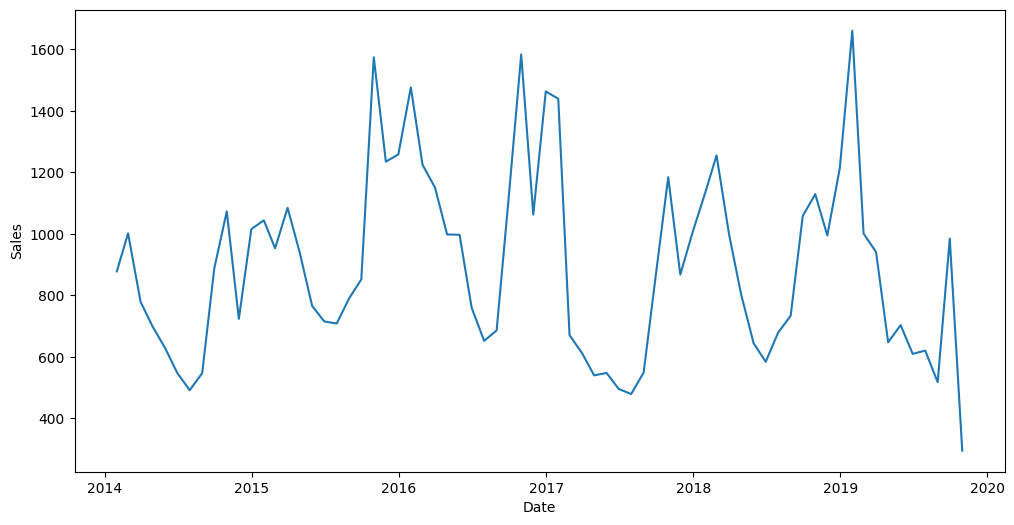

In [38]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sale['Sales'])

plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()

## Check for stationarity (constant mean and variance)

#### Use ACF and PACF plots to determine orders (p, d, q) - AFC= (Autocorrelation Function) , PACF= (Partial Autocorrelation Function)

 ##### 

Autocorrelation Function (ACF) Plot- :

The ACF plot shows the correlation between the time series at different lags (time lag- s).

Significant spikes in the ACF plot at various lags indicate the presence of autocorrelation in the - data.

The number of significant spikes can provide insights into the orders p-  and q:

Order q (MA order): If there is a significant spike at lag q, it suggests that the series may need q lags of the moving average
- component.
Order p (AR order): If there is a significant spike at lag p, it suggests that the series may need p lags of the autoregressiv


  e#####  component.
Partial Autocorrelation Function
 (- PACF) Plot:

The PACF plot shows the partial correlation between the time series at different lags while removing the effects of - shorter lags.

Significant spikes in the PACF plot at various lags indicate the presence of partial a- utocorrelation.

The number of significant spikes can help iden- tify the order p:

Order p (AR order): If there is a significant spike at lag p, it suggests that the series may need p lags of the auto
  r##### egressive component.- 
Integrated Order d:

The integrated order d represents the number of differences needed to make the time series stationary (const- ant mean and variance).
You can determine d by checking if differencing is required to achieve stationarity. If you need to difference t
  e series once to achieve stationarity, d = 1.

### Use ACF and PACF plots to determine orders (p, d, q)


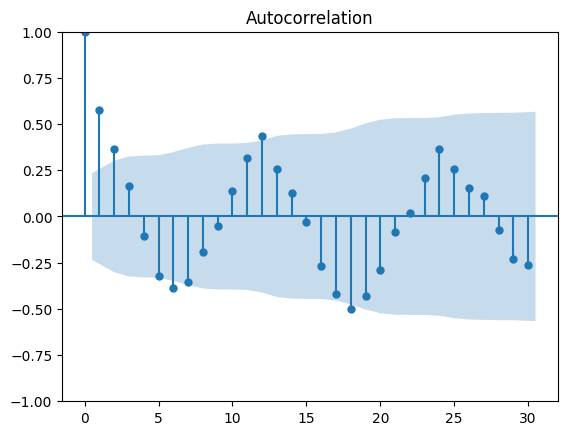

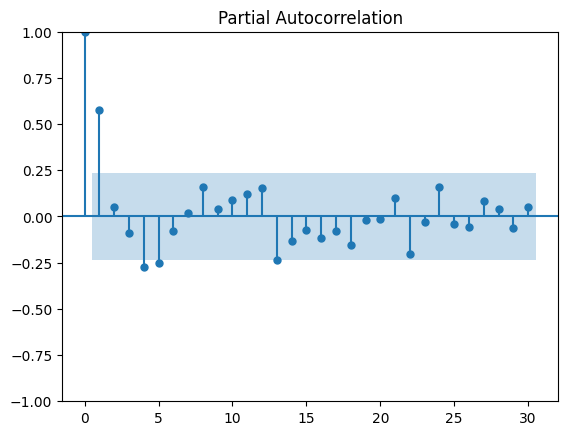

In [45]:
plot_acf(monthly_sale['Sales'], lags=30)
plot_pacf(monthly_sale['Sales'], lags=30)

plt.show()

### Perform the Augmented Dickey-Fuller Test for stationarity


In [46]:
result = adfuller(monthly_sale['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.464658490584557
p-value: 0.00022766721606201206
Critical Values: {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}


- ADF Statistic is less than the Critical Values, I can reject the null hypothesis and conclude that the
- data is stationary.

# Fit the ARIMA model

In [52]:
p, d, q = (1, 1, 1)  
model = ARIMA(monthly_sale['Sales'], order=(p, d, q))
model_fit = model.fit()

###  Forecast future sales

In [87]:

forecast_steps = 14# Adjust as needed
forecast = model_fit.forecast(steps=forecast_steps)

In [88]:
forecast

2019-11-30    514.373238
2019-12-31    651.648519
2020-01-31    737.608852
2020-02-29    791.436307
2020-03-31    825.142491
2020-04-30    846.248949
2020-05-31    859.465590
2020-06-30    867.741711
2020-07-31    872.924131
2020-08-31    876.169308
2020-09-30    878.201403
2020-10-31    879.473880
2020-11-30    880.270691
2020-12-31    880.769646
Freq: M, Name: predicted_mean, dtype: float64

In [89]:
# Inverse-difference the forecast if differencing was applied
inverse_forecast = np.cumsum(forecast)

In [90]:
inverse_forecast

2019-11-30      514.373238
2019-12-31     1166.021757
2020-01-31     1903.630609
2020-02-29     2695.066916
2020-03-31     3520.209407
2020-04-30     4366.458355
2020-05-31     5225.923945
2020-06-30     6093.665656
2020-07-31     6966.589787
2020-08-31     7842.759094
2020-09-30     8720.960497
2020-10-31     9600.434377
2020-11-30    10480.705068
2020-12-31    11361.474714
Freq: M, Name: predicted_mean, dtype: float64

# Visualize the actual and forecasted sales

In [91]:
# Generate date indices for the forecasted period
forecast_start_date = monthly_sale.index[-1] + pd.DateOffset(months=1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='MS')  # MS for month start frequenc

In [92]:
monthly_sale.shape

(70, 1)

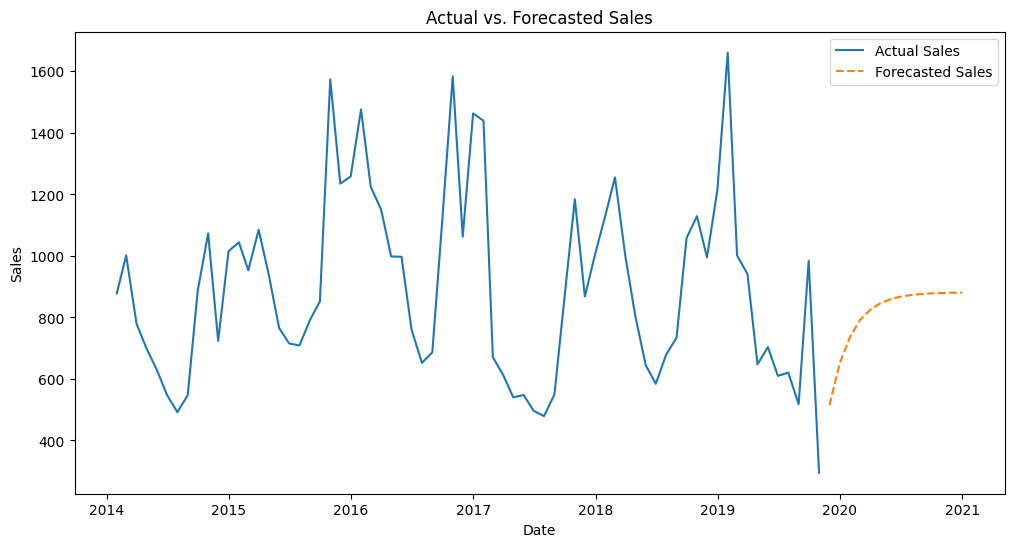

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sale['Sales'], label='Actual Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', linestyle='--')
plt.title('Actual vs. Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Creating DataFrame with the forcasted data

In [94]:
forecast.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 14 entries, 2019-11-30 to 2020-12-31
Freq: M
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
14 non-null     float64
dtypes: float64(1)
memory usage: 224.0 bytes


In [95]:
# Convert the Series to a DataFrame with custom column names
custom_column_names = ['Sale_N02BE']  # Replace with your custom column names
df = pd.DataFrame({custom_column_names[0]: forecast})

In [100]:
df.head()

,Sale_N02BE
2019-11-30,514.373238
2019-12-31,651.648519
2020-01-31,737.608852
2020-02-29,791.436307
2020-03-31,825.142491


# Plotting the forecated data 

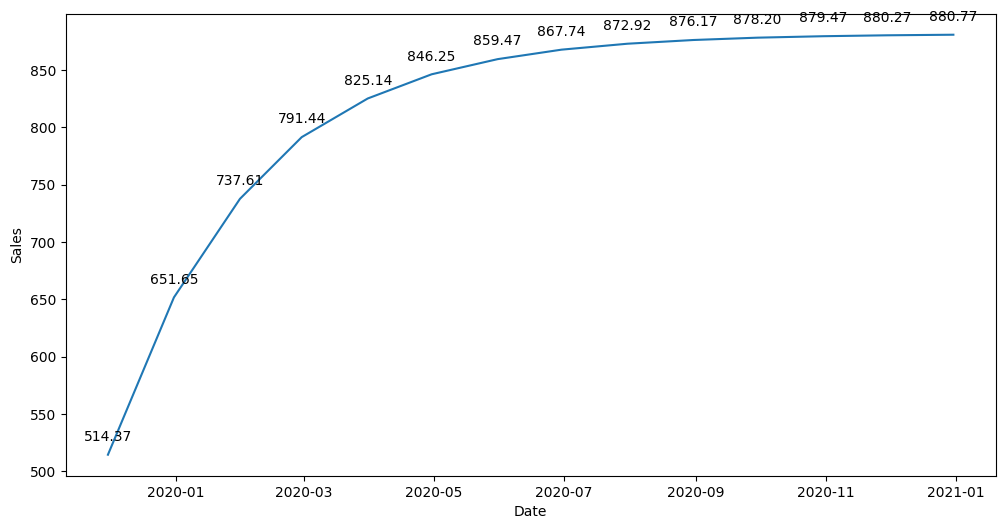

In [98]:
plt.figure(figsize=(12,6))
plt.plot(df['Sale_N02BE'])

plt.xlabel('Date')
plt.ylabel('Sales')

# Add annotations for data points
for i, row in df.iterrows():
    plt.annotate(f'{row["Sale_N02BE"]:.2f}', (i, row["Sale_N02BE"]), textcoords='offset points', xytext=(0,10), ha='center')


plt.show()

# observation

- Looks like we have good prediction on the time series data using ARIMA model
- We got good curve 

In [104]:
df.to_csv('monthly_prediction.csv', index=True)

In [103]:
joblib.dump(model,'Pharm_data_prediction_model_1.pkl')

['Pharm_data_prediction_model_1.pkl']